In [1]:
from wordcloud import WordCloud,STOPWORDS
import operator
from nltk.tokenize import WhitespaceTokenizer
from nltk import download, stem
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
path = "raven.txt"

In [3]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)

In [4]:
def load_file(file_path):
    text = ''.join([line for line in open(file_path,encoding='utf-8')])
    return text

In [5]:
article = load_file(path)

In [6]:
article

"Henry assaulted Florence and defeated the Black Guelphs, but there is no evidence that Dante was involved. Some say he refused to participate in the attack on his city by a foreigner; others suggest that he had become unpopular with the White Guelphs, too, and that any trace of his passage had carefully been removed. Henry VII died (from a fever) in 1313 and with him any hope for Dante to see Florence again. He returned to Verona, where Cangrande I della Scala allowed him to live in certain security and, presumably, in a fair degree of prosperity. Cangrande was admitted to Dante's Paradise.\nDuring the period of his exile, Dante corresponded with Dominican theologian Fr. Nicholas Brunacci OP [1240–1322], who had been a student of Thomas Aquinas at the Santa Sabina studium in Rome, later at Paris,[36] and of Albert the Great at the Cologne studium.[37] Brunacci became lector at the Santa Sabina studium, forerunner of the Pontifical University of Saint Thomas Aquinas, and later served i

In [7]:
def lemmatize_and_clean(article):
    lemmatizer = WordNetLemmatizer()
    cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                                 for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', article))if word.lower() not in stop_words]
    return cleaned_lemmatized_tokens

In [8]:
Counter(lemmatize_and_clean(article)).most_common(50)

[('florence', 7),
 ('dante', 7),
 ('refused', 3),
 ('exile', 3),
 ('studium', 3),
 ('henry', 2),
 ('defeated', 2),
 ('guelphs', 2),
 ('cangrande', 2),
 ('della', 2),
 ('brunacci', 2),
 ('thomas', 2),
 ('aquinas', 2),
 ('santa', 2),
 ('sabina', 2),
 ('later', 2),
 ('uguccione', 2),
 ('town', 2),
 ('death', 2),
 ('sentence', 2),
 ('go', 2),
 ('assaulted', 1),
 ('black', 1),
 ('evidence', 1),
 ('involved', 1),
 ('say', 1),
 ('participate', 1),
 ('attack', 1),
 ('city', 1),
 ('foreigner', 1),
 ('others', 1),
 ('suggest', 1),
 ('become', 1),
 ('unpopular', 1),
 ('white', 1),
 ('trace', 1),
 ('passage', 1),
 ('carefully', 1),
 ('removed', 1),
 ('vii', 1),
 ('died', 1),
 ('fever', 1),
 ('1313', 1),
 ('hope', 1),
 ('see', 1),
 ('returned', 1),
 ('verona', 1),
 ('scala', 1),
 ('allowed', 1),
 ('live', 1)]

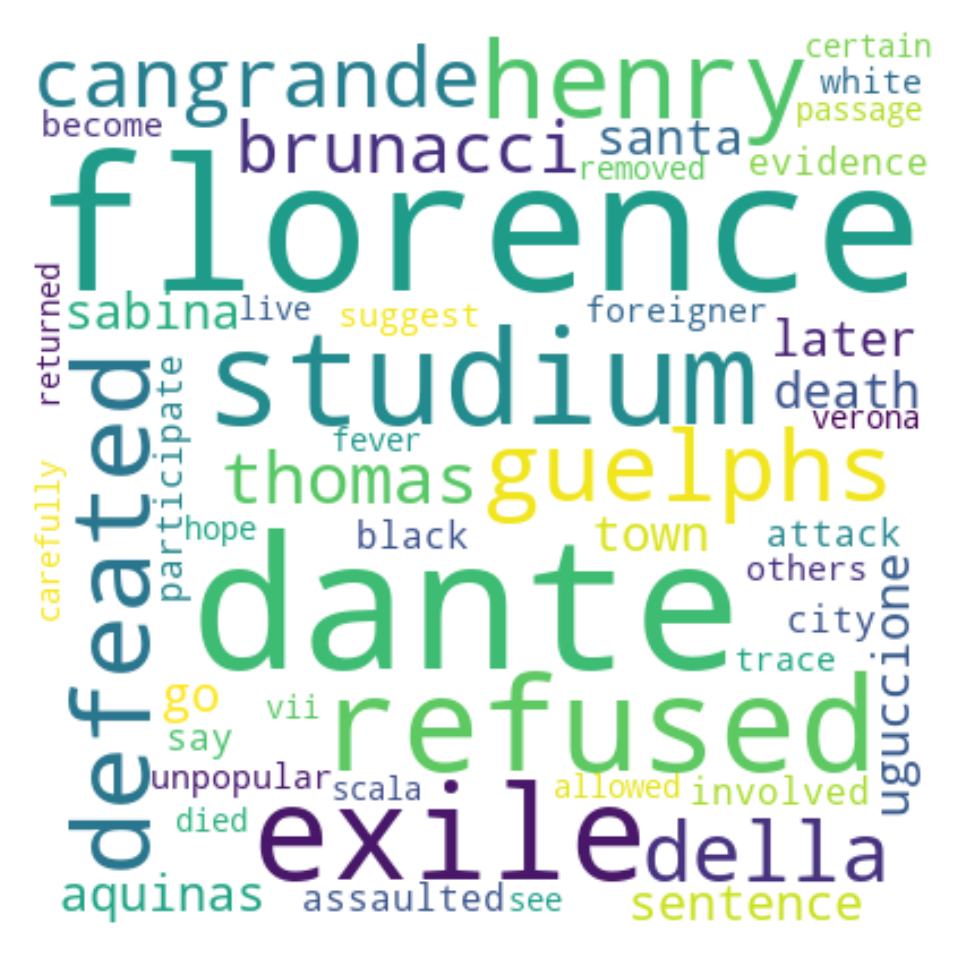

In [9]:
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(lemmatize_and_clean(article))
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                max_words=50,
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()